In [127]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Y Dataset')

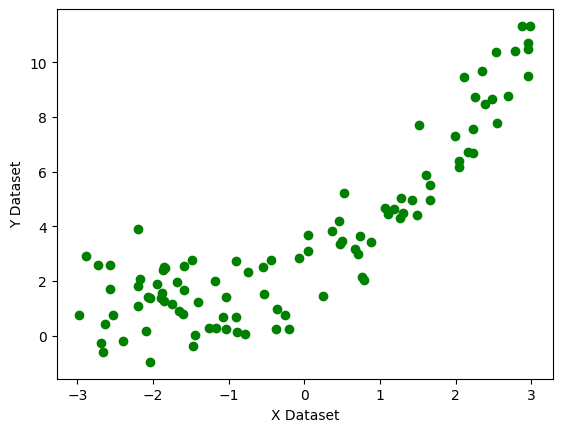

In [128]:
X = 6 * np.random.rand(100,1) - 3
y = 0.5 * X**2 + 1.5*X + 2 + np.random.randn(100,1)
# quadratic equation used - y = 0.5 * X**2 + 1.5*X + 2 + np.random.randn(100,1)
plt.scatter(X,y,color='g')
plt.xlabel('X Dataset')
plt.ylabel('Y Dataset')

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [130]:
# Simple Linear Regression
from sklearn.linear_model import LinearRegression
regression_1 = LinearRegression()

In [131]:
regression_1.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [132]:
from sklearn.metrics import r2_score
score = r2_score(y_test,regression_1.predict(X_test))
print(score)

0.7805792920001182


Text(0, 0.5, 'Y Dataset')

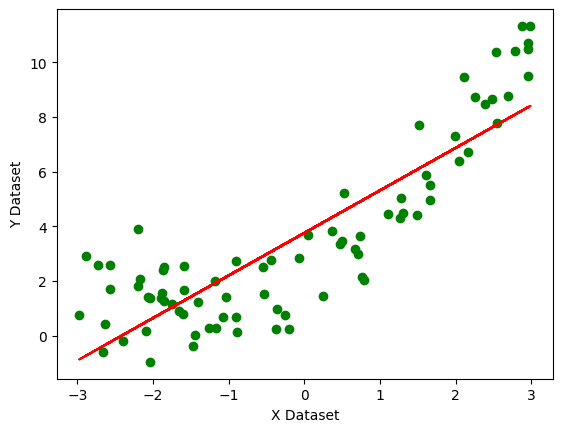

In [133]:
# Visualization
plt.plot(X_train,regression_1.predict(X_train),color='r')
plt.scatter(X_train,y_train,color='g')
plt.xlabel('X Dataset')
plt.ylabel('Y Dataset')

In [134]:
# Polynomial Transformation
from sklearn.preprocessing import PolynomialFeatures

In [135]:
poly = PolynomialFeatures(degree=6,include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_ploy = poly.transform(X_test)

In [136]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly,y_train)
y_pred = regression.predict(X_test_ploy)
score = r2_score(y_test,y_pred)
print(score)

0.8496918173488703


Text(0, 0.5, 'Y Dataset')

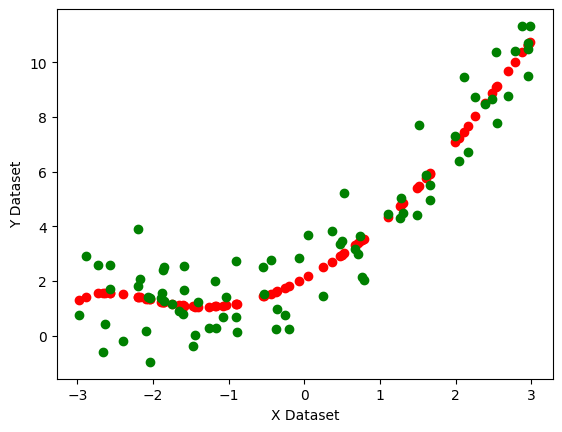

In [137]:
# Visualization
plt.scatter(X_train,regression.predict(X_train_poly),color='r')
plt.scatter(X_train,y_train,color='g')
plt.xlabel('X Dataset')
plt.ylabel('Y Dataset')

In [138]:
# Prediction of new data set
X_new = np.linspace(-3, 3, 200).reshape(200,1)
X_new_poly = poly.transform(X_new) 

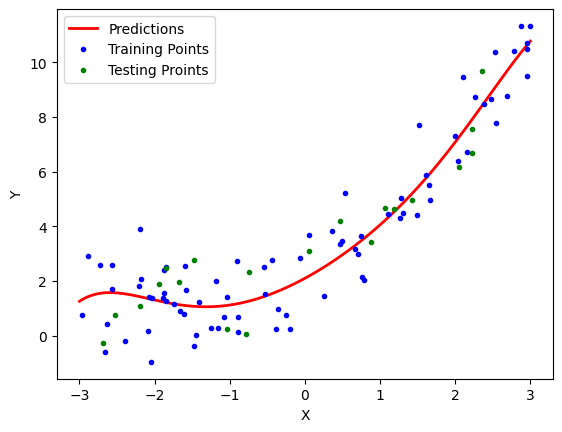

In [139]:
y_new = regression.predict(X_new_poly)
plt.plot(X_new, y_new, 'r-', linewidth=2, label='Predictions')
plt.plot(X_train,y_train,'b.',label='Training Points')
plt.plot(X_test,y_test,'g.',label='Testing Proints')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### Polynomial Regression Pipeline

In [140]:
from sklearn.pipeline import Pipeline

In [141]:
def poly_regression(degree):
    X_new = np.linspace(-3,3,200).reshape(200,1)

    poly_features = PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg = LinearRegression()
    poly_regression = Pipeline([
        ('poly_features',poly_features),
        ('lin_reg',lin_reg)
    ])
    poly_regression.fit(X_train,y_train)
    y_pred_new = poly_regression.predict(X_new)
    # Plotting prediction line
    plt.plot(X_new, y_pred_new, 'r', label='Degree' + str(degree), linewidth=3)
    plt.plot(X_train,y_train,'b.',linewidth=3)
    plt.plot(X_test,y_test,'g.',linewidth=3)
    plt.legend(loc='upper left')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.axis([-4,4,0,10])
    plt.show()

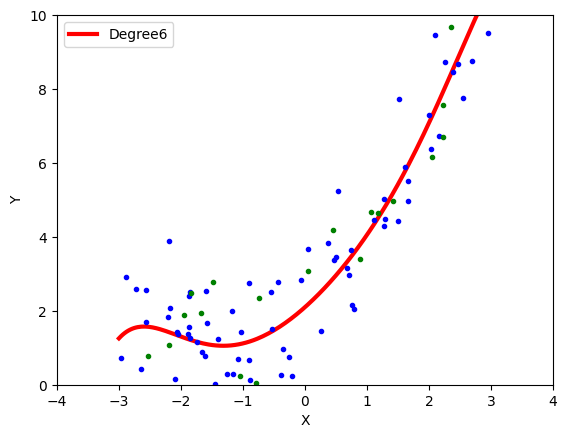

In [147]:
# Testing
poly_regression(6)